In [8]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline

In [9]:
Ghana_regions = gpd.read_file("C:/Users/Petra/Downloads/Ghana_regions/ghana_administrative.shp")
Ghana_regions.head()

,NAME,ADMIN_LEVE,geometry
0,None,4,"LINESTRING (-3.07637 7.06395, -3.07661 7.06423..."
1,None,4,"LINESTRING (-3.16611 6.25167, -3.17734 6.24347..."
2,Border CÃ´te d'Ivoire - Ghana,2,"LINESTRING (-3.16611 6.25167, -3.16861 6.25583..."
3,ComoÃ© National Park,None,"LINESTRING (-3.19604 8.67985, -3.19490 8.68322..."
4,Border CÃ´te d'Ivoire - Ghana,2,"LINESTRING (-2.96028 5.62722, -2.96028 5.63056..."


In [10]:
Ghana_regions = gpd.read_file("C:/Users/Petra/Downloads/Ghana_regions/ghana_administrative.shp")
print(Ghana_regions.crs)

epsg:4326


In [12]:
facilities_df = pd.read_csv("C:/Users/Petra/Downloads/Ghana_Health_Facilities/health-facilities-gh.csv")
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))
facilities.crs = {'init': 'epsg:4326'}
facilities.head()

C:\Users\Petra\anaconda3\envs\python_foundation\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


Reprojecting

<AxesSubplot:>

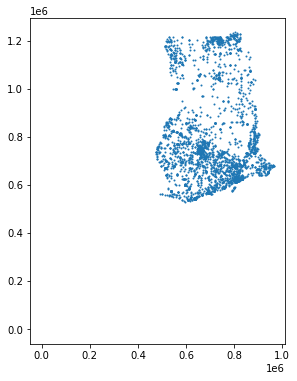

In [19]:
# Creating a map
ax = Ghana_regions.plot(figsize=(6,6), color='Whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [20]:
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In [21]:
# Changing CRS to EPSG 4326
Ghana_regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,NAME,ADMIN_LEVE,geometry
0,None,4,"LINESTRING (-3.07637 7.06395, -3.07661 7.06423..."
1,None,4,"LINESTRING (-3.16611 6.25167, -3.17734 6.24347..."
2,Border CÃ´te d'Ivoire - Ghana,2,"LINESTRING (-3.16611 6.25167, -3.16861 6.25583..."
3,ComoÃ© National Park,None,"LINESTRING (-3.19604 8.67985, -3.19490 8.68322..."
4,Border CÃ´te d'Ivoire - Ghana,2,"LINESTRING (-2.96028 5.62722, -2.96028 5.63056..."


In [ ]:
# calculating the area of Ghana
Ghana_regions.loc[:, "AREA"]